In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st

In [2]:
contributions_csv = "../senate_info_with_contributions.csv"
senate_year_csv = "../new_senators_by_year.csv"

In [353]:
#data frame for contributions
contributions_df = pd.read_csv(contributions_csv)
contributions_df

,Unnamed: 0.1,Unnamed: 0,Bio Guide ID,Name,Party,State,District Number,Senate End Year,Senate Start Year,House Start Year,...,2014 Contributions,2015 Contributions,2016 Contributions,2017 Contributions,2018 Contributions,2019 Contributions,2020 Contributions,2021 Contributions,2022 Contributions,Total Contributions 2013-2022
0,0,0,B001305,"Budd, Ted",Republican,North Carolina,NaN,NaN,2023.0,2017.0,...,0.00,0.00,25759.50,71475.00,121167.26,122832.44,115319.00,85040.00,617763.90,1159357.10
1,1,1,W000817,"Warren, Elizabeth",Democratic,Massachusetts,NaN,NaN,2013.0,NaN,...,59600.00,105158.81,120439.03,197290.24,91004.55,21483.61,15893.35,10000.00,0.00,661869.59
2,2,2,W000802,"Whitehouse, Sheldon",Democratic,Rhode Island,NaN,NaN,2007.0,NaN,...,214710.77,262836.85,228049.75,541347.47,688087.10,126452.72,47500.00,115500.00,123350.00,2495891.31
3,3,3,Y000064,"Young, Todd",Republican,Indiana,NaN,NaN,2017.0,2011.0,...,265122.15,543396.59,971535.00,242447.54,258472.05,574320.00,480184.00,1054659.29,1133276.54,5757304.38
4,4,4,W000800,"Welch, Peter",Democratic,Vermont,NaN,NaN,2023.0,2007.0,...,228650.00,222600.00,211532.20,176490.63,184071.50,142045.18,165732.00,223171.83,487716.58,2316759.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,418,G000445,"Gregg, Judd",Republican,New Hampshire,NaN,2011.0,1993.0,1981.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,0.00,0.00,2000.00
419,419,419,G000367,"Grams, Rod",Republican,Minnesota,NaN,2001.0,1995.0,1993.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
420,420,420,G000365,"Gramm, Phil",Republican,Texas,NaN,2002.0,1985.0,1979.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
421,421,421,G000321,"Gore, Albert,",Democratic,Tennessee,NaN,1993.0,1985.0,1977.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [237]:
#Summary stats by year for senate data
senate_df = pd.read_csv(senate_year_csv)
senate_df.tail(10)

,Unnamed: 0,Start Year,New Republicans,New Democrats,New Independents,New Independent Democrats,Average Years in Senate
46,46,2012.0,0,1,0,0,11.0
47,47,2013.0,5,11,1,0,8.1
48,48,2014.0,0,1,0,0,1.0
49,49,2015.0,12,1,0,0,7.7
50,50,2017.0,3,5,0,0,5.1
51,51,2018.0,1,2,0,0,4.3
52,52,2019.0,7,1,1,0,3.7
53,53,2020.0,1,1,0,0,2.0
54,54,2021.0,4,5,0,0,2.0
55,55,2023.0,6,2,0,0,0.0


In [238]:
#summarize contributions per year by grouping with party

totals_df = contributions_df.groupby('Party').sum()[['2014 Contributions',
                                                    '2015 Contributions',
                                                    '2016 Contributions',
                                                    '2017 Contributions',
                                                    '2018 Contributions',
                                                    '2019 Contributions',
                                                    '2020 Contributions',
                                                    '2021 Contributions',
                                                    '2022 Contributions']]
totals_df

,2014 Contributions,2015 Contributions,2016 Contributions,2017 Contributions,2018 Contributions,2019 Contributions,2020 Contributions,2021 Contributions,2022 Contributions
Party,,,,,,,,,
Democratic,41467138.00,29169072.09,29919147.00,25225203.31,34980771.56,22618345.92,24066352.37,24218931.59,22097927.94
Independent,594218.20,753039.96,1013356.16,1782117.61,1281437.12,1008889.82,765365.00,1118923.95,1214120.00
Independent Democrat,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Republican,45398237.46,34528598.26,38919928.99,25776177.35,26631187.36,31192948.13,30074760.92,20175629.61,32742872.38


In [239]:
#renaming columns and cleaning the dataframe
year_totals_df = totals_df.rename(columns={'2014 Contributions': 2014,
                                            '2015 Contributions': 2015,
                                            '2016 Contributions': 2016,
                                            '2017 Contributions': 2017,
                                            '2018 Contributions': 2018,
                                            '2019 Contributions': 2019,
                                            '2020 Contributions': 2020,
                                            '2021 Contributions': 2021,
                                            '2022 Contributions': 2022})
totals_party_df = year_totals_df.T
totals_party_df = totals_party_df[['Democratic', 'Independent', 'Republican']]
totals_party_df = totals_party_df.reset_index().rename(columns={'index':"Start Year"})
totals_party_df

Party,Start Year,Democratic,Independent,Republican
0,2014,41467138.00,594218.20,45398237.46
1,2015,29169072.09,753039.96,34528598.26
2,2016,29919147.00,1013356.16,38919928.99
3,2017,25225203.31,1782117.61,25776177.35
4,2018,34980771.56,1281437.12,26631187.36
5,2019,22618345.92,1008889.82,31192948.13
6,2020,24066352.37,765365.00,30074760.92
7,2021,24218931.59,1118923.95,20175629.61
8,2022,22097927.94,1214120.00,32742872.38


In [240]:
#merging senate summary infor with contributions
total_df = pd.merge(totals_party_df,senate_df, how='left', on='Start Year')
totals_df = total_df.drop(labels=['Unnamed: 0','New Independent Democrats','Independent','New Independents'],axis=1)
totals_df

,Start Year,Democratic,Republican,New Republicans,New Democrats,Average Years in Senate
0,2014,41467138.00,45398237.46,0.0,1.0,1.0
1,2015,29169072.09,34528598.26,12.0,1.0,7.7
2,2016,29919147.00,38919928.99,NaN,NaN,NaN
3,2017,25225203.31,25776177.35,3.0,5.0,5.1
4,2018,34980771.56,26631187.36,1.0,2.0,4.3
5,2019,22618345.92,31192948.13,7.0,1.0,3.7
6,2020,24066352.37,30074760.92,1.0,1.0,2.0
7,2021,24218931.59,20175629.61,4.0,5.0,2.0
8,2022,22097927.94,32742872.38,NaN,NaN,NaN


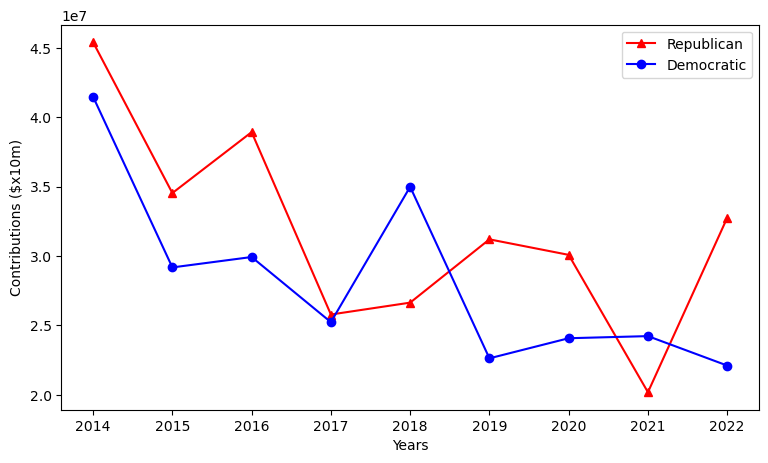

In [244]:
#ploting contributions by party over years
dem_vs_rep = plt.figure(figsize=(9,5))
#plotting the two lines
totals_df['Republican'].plot(color='red', marker = '^')
totals_df['Democratic'].plot(color='blue', marker = 'o')
#labeling x ticks, axis, and creating a legend
plt.xticks(ticks = range(len(totals_df)), labels = totals_df['Start Year'])
plt.xlabel('Years')
plt.ylabel('Contributions ($x10m)')
plt.legend()
plt.show()
dem_vs_rep.savefig("dem_vs_rep")

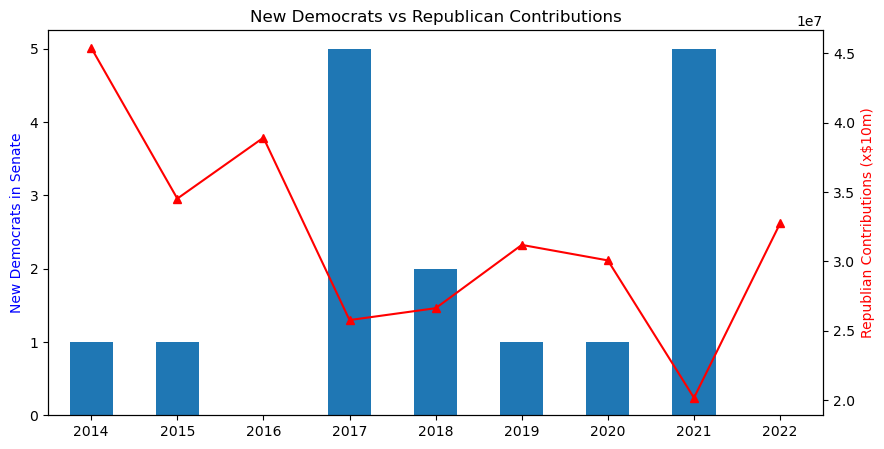

In [245]:
#new dem senators vs republican contributions
new_dems = plt.figure(figsize=(10,5))
#creating the bar graph of new senators
totals_df['New Democrats'].plot(kind = 'bar')
plt.ylabel("New Democrats in Senate", color ='b')
#creating line graph of contributions
totals_df['Republican'].plot(color='red', marker = '^', secondary_y=True)
plt.ylabel('Republian Contributions (x$10m)', color='r')

#seting xtick labels and title
plt.xticks(ticks = range(len(totals_df)), labels = totals_df['Start Year'])
plt.title('New Democrats vs Republican Contributions')
plt.show()
new_dems.savefig("Dem_vs_repub_contributions")

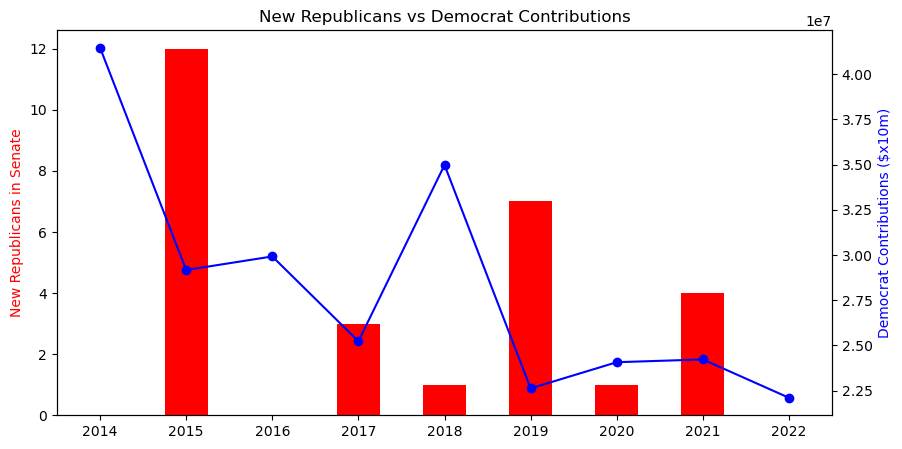

In [246]:
#new republican senators vs democratic contributions
new_repubs = plt.figure(figsize=(10,5))
totals_df['New Republicans'].plot(kind = 'bar', color= "red")
#creating the bar graph of new senators
plt.ylabel("New Republicans in Senate", color='r')
totals_df['Democratic'].plot(color='blue', marker = 'o', secondary_y=True)
#creating line graph of contributions and formating
plt.ylabel('Democrat Contributions ($x10m)', color='b')
plt.xticks(ticks = range(len(totals_df)), labels = totals_df['Start Year'])
plt.title('New Republicans vs Democrat Contributions')
plt.show()
new_repubs.savefig("repub_vs_dem_contributions")

In [329]:
#select pertinent information to examin the year 2020
contributions_2020 = contributions_df[['Party','Name','State','Senate Start Year','Senate End Year','2020 Contributions']]
#filter senators that started in the senate before 2020
contributions_2020 = contributions_2020.loc[contributions_2020['Senate Start Year'] <= 2020,:]
#Make sure the end dates were after or equal to 2020 or their end dates are null
contributions_2020 = contributions_2020.loc[(contributions_2020['Senate End Year'] >= 2020) | (contributions_2020['Senate End Year'].isnull()),:]
#filter out independents
contributions_2020 = contributions_2020.loc[contributions_2020['Party'] != 'Independent',:]
contributions_2020

,Party,Name,State,Senate Start Year,Senate End Year,2020 Contributions,Years in Senate
1,Democratic,"Warren, Elizabeth",Massachusetts,2013.0,NaN,15893.35,10.0
2,Democratic,"Whitehouse, Sheldon",Rhode Island,2007.0,NaN,47500.00,16.0
3,Republican,"Young, Todd",Indiana,2017.0,NaN,480184.00,6.0
5,Democratic,"Wyden, Ron",Oregon,1996.0,NaN,426700.00,27.0
6,Republican,"Wicker, Roger F.",Mississippi,2007.0,NaN,244134.00,16.0
...,...,...,...,...,...,...,...
135,Republican,"Gardner, Cory",Colorado,2015.0,2021.0,1326515.00,6.0
161,Democratic,"Udall, Tom",New Mexico,2009.0,2021.0,14898.71,12.0
164,Republican,"Enzi, Michael B.",Wyoming,1997.0,2021.0,0.00,24.0
205,Republican,"Roberts, Pat",Kansas,1997.0,2021.0,49258.11,24.0


In [248]:
#create a new data frame that is a copy of contributions_2020
party_cont = contributions_2020[['Party','Name','State','Senate End Year','2020 Contributions']]
party_cont

,Party,Name,State,Senate End Year,2020 Contributions
1,Democratic,"Warren, Elizabeth",Massachusetts,NaN,15893.35
2,Democratic,"Whitehouse, Sheldon",Rhode Island,NaN,47500.00
3,Republican,"Young, Todd",Indiana,NaN,480184.00
5,Democratic,"Wyden, Ron",Oregon,NaN,426700.00
6,Republican,"Wicker, Roger F.",Mississippi,NaN,244134.00
...,...,...,...,...,...
135,Republican,"Gardner, Cory",Colorado,2021.0,1326515.00
161,Democratic,"Udall, Tom",New Mexico,2021.0,14898.71
164,Republican,"Enzi, Michael B.",Wyoming,2021.0,0.00
205,Republican,"Roberts, Pat",Kansas,2021.0,49258.11


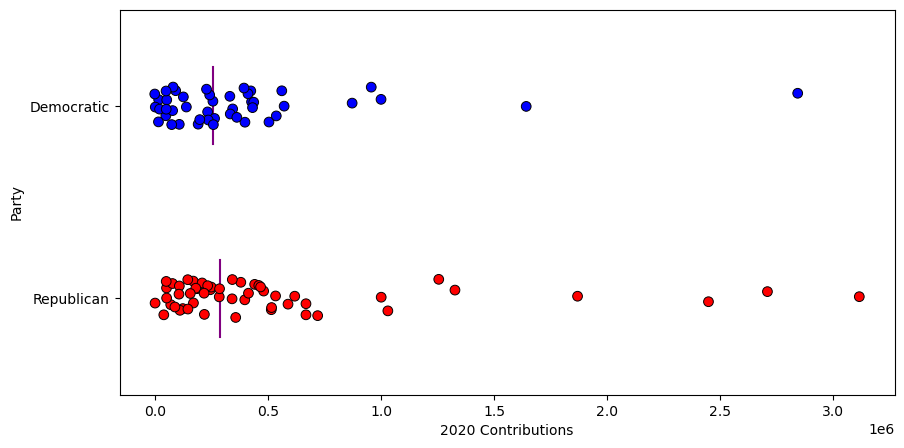

In [219]:
#create a split plot
contrib_party = plt.figure(figsize=(10,5))
p = sns.stripplot(data=party_cont,
                  y="Party",
                  x="2020 Contributions",
                  palette = {'blue','red'},
                  edgecolor = 'black',
                  linewidth = .7,
                  size = 7
              )
#use boxplot to get the median line
s = sns.boxplot(showmeans=False,
            meanline=False,
            meanprops={'color': 'blue'},
            medianprops={'visible': True,'color':'purple'},
            whiskerprops={'visible': False},
            zorder=1,
            y="Party",
            x="2020 Contributions",
            data=party_cont,
            width= .4,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)

plt.show()

contrib_party.savefig('contributions_by_party')

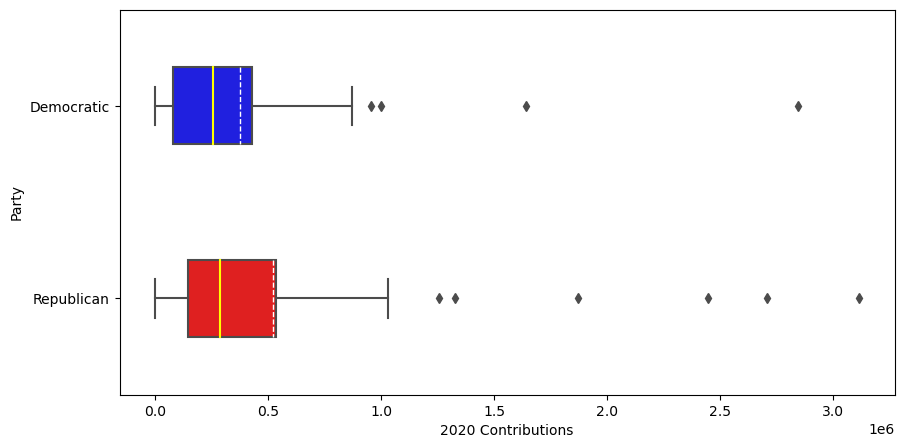

In [232]:
#create a box plot for cleaner outlier look
contrib_boxplot = plt.figure(figsize=(10,5))
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'white'},
            medianprops={'color':'yellow'},
            whiskerprops={'visible': True},
            zorder=1,
            y="Party",
            x="2020 Contributions",
            data=party_cont,
            width= .4,
            showfliers=True,
            showbox=True,
           palette = {'blue','red'})
plt.title()
contrib_boxplot.savefig('contributions_party')
plt.show()

In [228]:
#create summary stats for 2020

party_mean = round(party_cont.groupby('Party').mean()['2020 Contributions'],2)
party_mean = party_mean.rename("Mean Contributions")

party_median = party_cont.groupby('Party').median()['2020 Contributions']
party_median = party_median.rename("Median Contributions")

party_var = party_cont.groupby('Party').var()['2020 Contributions']
party_var = party_var.rename("Contributions Variance")

party_dev = round(party_cont.groupby('Party').std()['2020 Contributions'],2)
party_dev = party_dev.rename("Contribution Std. Deviation")

party_err = round(party_cont.groupby('Party').sem()['2020 Contributions'],2)
party_err = party_err.rename('Contribution Std. Er.')

In [229]:
#merge the summary data
summary_df = pd.merge(party_mean,party_median,on="Party").join(
    party_var,on="Party").join(
    party_dev,on="Party").join(party_err,on="Party")



In [230]:
summary_df

,Mean Contributions,Median Contributions,Contributions Variance,Contribution Std. Deviation,Contribution Std. Er.
Party,,,,,
Democratic,373539.25,255754.2,2.412836e+11,491206.26,73224.71
Republican,520799.88,285084.0,4.407911e+11,663921.00,91196.56


In [252]:
contributions_df.head()

,Unnamed: 0.1,Unnamed: 0,Bio Guide ID,Name,Party,State,District Number,Senate End Year,Senate Start Year,House Start Year,...,2014 Contributions,2015 Contributions,2016 Contributions,2017 Contributions,2018 Contributions,2019 Contributions,2020 Contributions,2021 Contributions,2022 Contributions,Total Contributions 2013-2022
0,0,0,B001305,"Budd, Ted",Republican,North Carolina,NaN,NaN,2023.0,2017.0,...,0.00,0.00,25759.50,71475.00,121167.26,122832.44,115319.00,85040.00,617763.90,1159357.10
1,1,1,W000817,"Warren, Elizabeth",Democratic,Massachusetts,NaN,NaN,2013.0,NaN,...,59600.00,105158.81,120439.03,197290.24,91004.55,21483.61,15893.35,10000.00,0.00,661869.59
2,2,2,W000802,"Whitehouse, Sheldon",Democratic,Rhode Island,NaN,NaN,2007.0,NaN,...,214710.77,262836.85,228049.75,541347.47,688087.10,126452.72,47500.00,115500.00,123350.00,2495891.31
3,3,3,Y000064,"Young, Todd",Republican,Indiana,NaN,NaN,2017.0,2011.0,...,265122.15,543396.59,971535.00,242447.54,258472.05,574320.00,480184.00,1054659.29,1133276.54,5757304.38
4,4,4,W000800,"Welch, Peter",Democratic,Vermont,NaN,NaN,2023.0,2007.0,...,228650.00,222600.00,211532.20,176490.63,184071.50,142045.18,165732.00,223171.83,487716.58,2316759.92


In [361]:
#all senators that were sitting during the 2013-2022
current_df = contributions_df.loc[(contributions_df['Senate End Year'] >= 2013) | (contributions_df['Senate End Year'].isnull()),:]
current_df

,Unnamed: 0.1,Unnamed: 0,Bio Guide ID,Name,Party,State,District Number,Senate End Year,Senate Start Year,House Start Year,...,2014 Contributions,2015 Contributions,2016 Contributions,2017 Contributions,2018 Contributions,2019 Contributions,2020 Contributions,2021 Contributions,2022 Contributions,Total Contributions 2013-2022
0,0,0,B001305,"Budd, Ted",Republican,North Carolina,NaN,NaN,2023.0,2017.0,...,0.00,0.00,25759.50,71475.00,121167.26,122832.44,115319.00,85040.00,617763.90,1159357.10
1,1,1,W000817,"Warren, Elizabeth",Democratic,Massachusetts,NaN,NaN,2013.0,NaN,...,59600.00,105158.81,120439.03,197290.24,91004.55,21483.61,15893.35,10000.00,0.00,661869.59
2,2,2,W000802,"Whitehouse, Sheldon",Democratic,Rhode Island,NaN,NaN,2007.0,NaN,...,214710.77,262836.85,228049.75,541347.47,688087.10,126452.72,47500.00,115500.00,123350.00,2495891.31
3,3,3,Y000064,"Young, Todd",Republican,Indiana,NaN,NaN,2017.0,2011.0,...,265122.15,543396.59,971535.00,242447.54,258472.05,574320.00,480184.00,1054659.29,1133276.54,5757304.38
4,4,4,W000800,"Welch, Peter",Democratic,Vermont,NaN,NaN,2023.0,2007.0,...,228650.00,222600.00,211532.20,176490.63,184071.50,142045.18,165732.00,223171.83,487716.58,2316759.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,399,399,B000243,"Baucus, Max",Democratic,Montana,NaN,2014.0,1979.0,1975.0,...,49034.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1093223.65
404,404,404,A000069,"Akaka, Daniel K.",Democratic,Hawaii,NaN,2013.0,1990.0,1977.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
411,411,411,K000352,"Kyl, Jon",Republican,Arizona,NaN,2013.0,1995.0,1987.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
413,413,413,J000177,"Johnson, Tim",Democratic,South Dakota,NaN,2015.0,1997.0,1987.0,...,11809.12,0.00,0.00,2000.00,500.00,0.00,0.00,0.00,0.00,197034.92


The correlations between Years in the Senate and Total Contributions in PearsonRResult(statistic=0.2049966099697518, pvalue=0.007685295358946908)


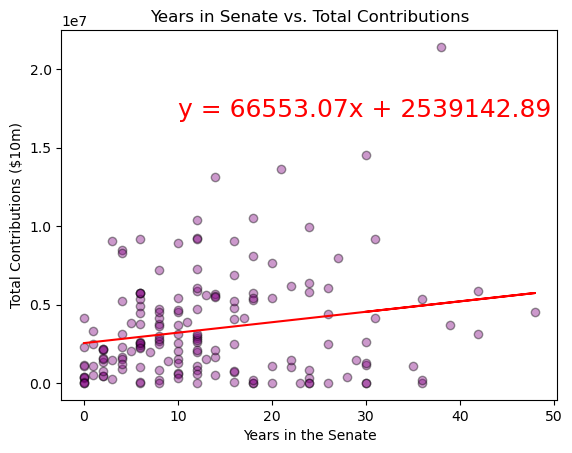

In [359]:
#variables for the x and y axis
years = current_df['Years in Senate']
total_cont = current_df['Total Contributions 2013-2022']

#correlation coeffeciant
corr_coef = st.pearsonr(years,total_cont)
print(f'The correlations between Years in the Senate and Total Contributions in {corr_coef}')

#name the figure
year_vs_cont = plt.figure('year_vs_cont')
#line equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(years,total_cont)
regress_values = years * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))

#ploting the variables and linear regression
plt.scatter(years,total_cont, color='purple', alpha=.4, edgecolor='black')
plt.plot(years,regress_values,"r-")

#format the graph and add line equation
plt.annotate(line_eq,(10,17000000),fontsize=18,color="red")
plt.xlabel("Years in the Senate")
plt.ylabel("Total Contributions ($10m)")
plt.title('Years in Senate vs. Total Contributions')
plt.show()

#save the image
year_vs_cont.savefig('year_vs_cont')